In [54]:
import cv2
import dlib
import matplotlib.pyplot as plt
import math

In [55]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

def align_face(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)
    if len(faces) == 0:
        return None
    for face in faces:
        landmarks = predictor(gray, face)
        left_eye = [landmarks.part(36).x, landmarks.part(36).y]
        right_eye = [landmarks.part(45).x, landmarks.part(45).y]
        center = [(left_eye[0]+right_eye[0])/2, (left_eye[1]+right_eye[1])/2]
        dx = right_eye[0] - left_eye[0]
        dy = right_eye[1] - left_eye[1]
        angle = -1 * math.degrees(math.atan2(dy, dx))
        scale = 1
        M = cv2.getRotationMatrix2D(center, angle, scale)
        aligned = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]), flags=cv2.INTER_LINEAR)
        return aligned


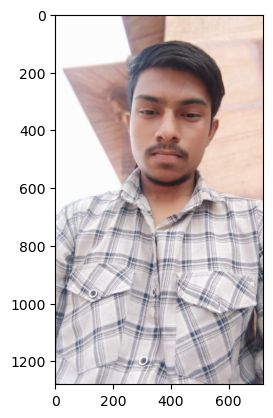

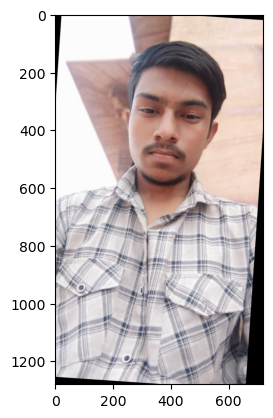

In [73]:
img = cv2.imread("./myimages/1.jpeg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
img = align_face(img)
plt.imshow(img)
plt.show()

In [57]:
def extract_features(img):
    face_detector = dlib.get_frontal_face_detector()
    face_pose_predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
    face_encoder = dlib.face_recognition_model_v1("dlib_face_recognition_resnet_model_v1.dat")

    face_rects = face_detector(img, 0)
    faces = [(face_pose_predictor(img, face_rect), face_rect) for face_rect in face_rects]

    descriptors = []
    for face, _ in faces:
        descriptor = face_encoder.compute_face_descriptor(img, face)
        descriptors.append(descriptor)

    return descriptors

In [58]:
descriptors = []

In [74]:
descriptor = extract_features(img)
for i in descriptor:
    descriptors.append(i)

In [63]:
# print(type(descriptors[0]))
X_train = np.array(descriptors)
X_train


array([[-0.03797058,  0.13689935,  0.01016362, -0.08287322, -0.01424474,
        -0.030925  , -0.03546693, -0.05985935,  0.14975765, -0.01781141,
         0.2303438 , -0.07283764, -0.22804973, -0.02470574, -0.03835715,
         0.03181301, -0.28077355, -0.05913217, -0.09427204, -0.09266324,
         0.06190315,  0.05263853,  0.00635514,  0.09330769, -0.17247078,
        -0.24791531, -0.08306549, -0.12086261,  0.11943474, -0.12352192,
         0.06383269, -0.00477733, -0.18814841, -0.0703515 ,  0.00711907,
        -0.03542961, -0.06151934, -0.1528555 ,  0.21698155, -0.04266784,
        -0.06972012,  0.06311248,  0.10384904,  0.25364035,  0.07328538,
         0.09109201, -0.01230983, -0.09295721,  0.20867886, -0.26982504,
         0.05941447,  0.16424537,  0.16611497,  0.0413575 ,  0.09576511,
        -0.2560766 ,  0.05696277,  0.15925364, -0.23187567,  0.20300093,
        -0.01898011, -0.01886788,  0.00476244, -0.06060775,  0.13738228,
         0.03806059, -0.13379094, -0.10408875,  0.1

In [75]:
import numpy as np
from sklearn import svm

# Load the training data
label = ['khem','york','khemchand']
X_train = np.array(descriptors)
y_train = label

# Train the SVM model
clf = svm.SVC(kernel='linear', probability=True)
clf.fit(X_train, y_train)


SVC(kernel='linear', probability=True)

In [78]:
y_pred = clf.predict([descriptors[2]])

In [79]:
y_pred

array(['khemchand'], dtype='<U9')

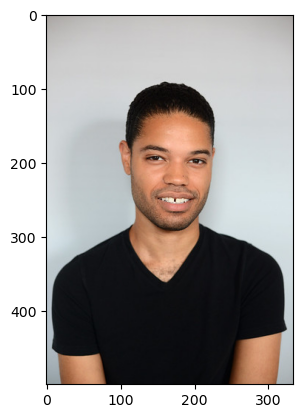

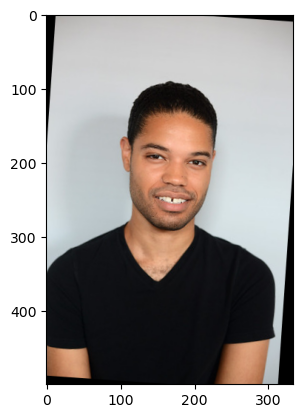

In [101]:
image = cv2.imread("../images/unknown.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()
image = align_face(image)
plt.imshow(image)
plt.show()

In [102]:
myimage = extract_features(image)

In [103]:
myimage = np.array(myimage)
myimage

array([[-1.84673563e-01,  7.26280659e-02,  1.59119159e-01,
         1.95178688e-02, -3.09662372e-02, -1.14262335e-01,
        -4.10409570e-02, -3.54816914e-02,  1.05007537e-01,
        -1.50771718e-02,  2.85153061e-01, -1.59230251e-02,
        -1.92671970e-01, -2.12825939e-01,  3.62648591e-02,
         1.42347336e-01, -1.54963166e-01, -7.28683993e-02,
         1.41357528e-02, -4.10649292e-02,  1.39453843e-01,
        -4.98034917e-02,  7.10768402e-02,  7.49084577e-02,
        -1.59351319e-01, -4.08573598e-01, -1.33444414e-01,
        -1.52153179e-01, -5.23575954e-03, -1.49392962e-01,
        -5.69374226e-02,  5.70374317e-02, -1.35476783e-01,
        -4.02847528e-02, -1.03432834e-01,  2.44576409e-02,
         6.30244091e-02, -2.62062401e-02,  7.60423169e-02,
        -1.94720924e-05, -1.57301456e-01, -7.94250965e-02,
        -6.15440570e-02,  2.64020056e-01,  1.99382022e-01,
         2.66462564e-02,  8.82521123e-02,  8.56317133e-02,
         8.53906870e-02, -2.55440027e-01,  2.57208701e-0

In [105]:
clf.predict(myimage)

array(['khemchand'], dtype='<U9')